In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import pickle

import astropy.units as u
import astropy.constants as const


In [3]:
plt.style.use('science')

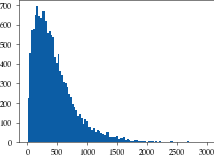

In [4]:
df = pd.read_csv("../data/catalogues/rev_AF_stars.csv", dtype={'kic': str})
m = (df.new_mass > 0) & (df.new_radius > 0)
df = df[m]

df['density'] = ((3*(df.new_mass.values * u.M_sun).to(u.kg)) / (4*np.pi*(df.new_radius.values * u.R_sun).to(u.m)**3)).value
plt.hist(df.density, bins=100);

In [5]:
densities = np.percentile(df.density, [16, 50, 84]) * (u.kg / u.m**3)

In [15]:
P = np.geomspace(1e-5, 100, 100) * u.day
T = ((3 * (P.to(u.s)[:, None])) / (densities * np.pi**2 * const.G))**(1/3)
T = T.to(u.day)

In [16]:
lc_cutoff = (30 * u.min).to(u.day)
sc_cutoff = (2 * u.min).to(u.day)
tess_10min =  (10 * u.min).to(u.day)

In [17]:
koi_dsct = pd.read_csv('../pulsation timing/data/koi_dsct.csv')
koi_dsct

,Unnamed: 0,Unnamed: 0.1,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,...,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,dsct,nfreqs
0,0,0,3964109,K00393.01,Kepler-544 b,CONFIRMED,Done,16/8/18,CANDIDATE,1.000,...,0.63,0.57,0.000,1.300,0.500,0.510,0.500,0.530,True,1
1,1,1,9111849,K02042.01,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,0.994,...,0.31,0.13,0.150,0.120,-0.200,0.130,0.250,0.130,True,4
2,2,2,9845898,K02423.01,Kepler-1233 b,CONFIRMED,Done,16/8/18,CANDIDATE,1.000,...,0.60,0.85,0.110,0.700,-0.700,1.100,0.700,1.100,True,3
3,3,3,5202905,K01932.01,Kepler-340 c,CONFIRMED,Done,16/8/18,CANDIDATE,0.944,...,0.32,0.23,-0.110,0.260,0.430,0.230,0.440,0.220,True,4
4,4,4,5202905,K01932.02,Kepler-340 b,CONFIRMED,Done,16/8/18,CANDIDATE,0.636,...,0.39,0.39,0.400,0.440,-0.150,0.250,0.430,0.400,True,4
5,5,5,6116172,K06142.02,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,NaN,...,7.90,2.70,-8.000,2.100,-0.580,0.230,8.000,2.100,True,1
6,6,6,6116172,K06142.01,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,NaN,...,7.90,2.70,-8.000,2.100,-0.580,0.230,8.000,2.100,True,1
7,7,7,6116172,K06142.02,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,NaN,...,7.90,2.70,-8.000,2.100,-0.580,0.230,8.000,2.100,True,1
8,8,8,11013201,K00972.03,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,0.632,...,5.20,1.50,-3.210,0.810,4.300,1.100,5.400,1.300,True,4
9,9,9,11013201,K00972.02,NaN,CANDIDATE,Done,16/8/18,CANDIDATE,0.000,...,3.90,1.70,-4.700,1.200,3.000,1.800,5.600,1.700,True,4


Text(0, 0.5, 'Transit period [days]')

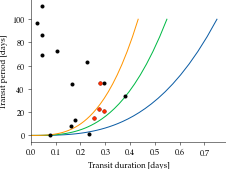

In [30]:
plt.plot(T, P)
m = koi_dsct.koi_disposition == 'CONFIRMED'
plt.plot((koi_dsct.koi_duration.values*u.hr).to(u.day).value, koi_dsct.koi_period, '.k')
plt.plot((koi_dsct.koi_duration.values*u.hr).to(u.day).value[m], koi_dsct.koi_period[m], '.')
# plt.axvline(lc_cutoff.value, c='C3', linestyle='dashed')
# plt.axhline(sc_cutoff.value, c='C3', linestyle='dashed')
# plt.axhline(tess_10min.value, c='C3', linestyle='dashed')
# plt.ylim(0, 0.03)
plt.xlim(0, None)
plt.xlabel('Transit duration [days]')
plt.ylabel('Transit period [days]')
# plt.yscale('log')
# plt.xscale('log')

Text(0, 0.5, 'T')

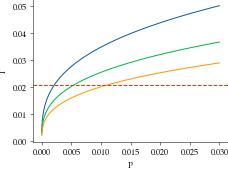

In [187]:
plt.plot(P, T)
plt.axhline(lc_cutoff.value, c='C3', linestyle='dashed')

plt.xlabel('P')
plt.ylabel('T')

In [188]:
lc_cutoff

<Quantity 0.02083333 d>

In [110]:
densities = np.linspace(np.median(df.density) - np.std(df.density),
                        np.median(df.density) + np.std(df.density),
                        101) * (u.kg / u.m**3)

In [120]:
P = np.geomspace(1e-5, 0.1, 100) * u.day
T = ((3 * (P.to(u.s)[:, None])) / (densities * np.pi**2 * const.G))**(1/3)
T = T.to(u.day)

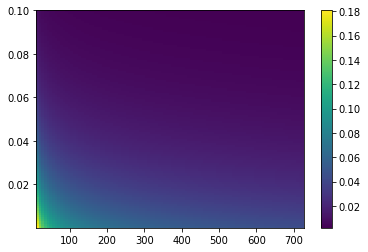

In [136]:
#  floats (left, right, bottom, top), optional
extent = [densities.value.min(), densities.value.max(), P.value.min(), P.value.max()]
plt.imshow(T, extent=extent, interpolation='none', aspect='auto')
plt.colorbar()

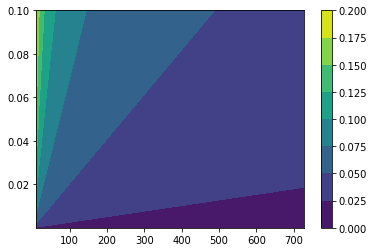

In [123]:
plt.contourf(densities,P,T)
plt.colorbar()

In [102]:
T = (np.linspace(0, 0.1, 100) * u.day).to(u.s)
P =(densities * np.pi**2 * const.G * T[:,None]**3 / 3).to(u.day)

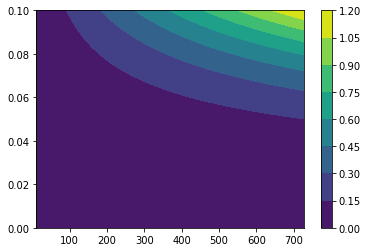

In [103]:
plt.contourf(densities, T.to(u.day), P)
plt.colorbar()

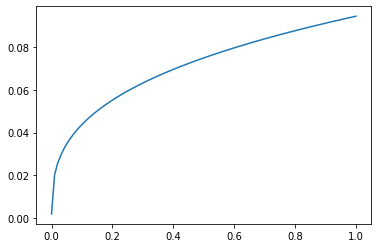

In [94]:
plt.plot(P, T[:,100])